# LAB 1 : Realisation of Logic Gates and Linear Regression Equation

Name : Joshitha Gandra

Roll Number : 180020009

Referrence Material : Page no. 26-29, Artificial Neural Network by B. Yegnanarayana




#**Problem 1** : Demonstrate the realization of NAND gate, NOR gate, and XOR gate using McCulloch Pitts (MP) and Rosenblatt’s Perceptron model.

  1. Write down the truth table of the logic gates.
  2. For MP model: compute the appropriate weight, such that the neuron provide logic
  gate output.
  3. For Perceptron: use truth table values as input and output to learn the weights
  through weight update equation.

## Programming : 
**McCulloch Pitts Model**

Fixed weights (not learnable, computed with rules)

Activation: Hardlimiting

In [2]:
## Part A : MP model

import numpy as np
import matplotlib.pyplot as plt


def mp_model(x,gate):
 
  ## Write the activation function and define weights and bias for all three gates
  def activationfn(v):
    if (v >= 0):
        return 1
    else:
        return 0

  def model(x, w, b):
    v = np.dot(w, x) + b
    y = activationfn(v)
    return y
  
  if gate == "NAND":

    ## Write your code here
    w = (-1, -1)
    b = 1.5
    out = model(x, w, b)

  if gate == "NOR":

    ## Write your code here
    w = (-1, -1)
    b = 0.5
    out = model(x, w, b)
  
  if gate == "XOR":

    ## Write your code here
    out = 1

  
  return out


inp_list = [(0, 0),(0,1),(1,0), (1,1)]
## Create a list consisting of inputs to logic gates (Binary, i.e (0,0),(0,1),(1,0),(1,1))
req_gates = ['NAND', 'NOR', 'XOR']
## Create a list of all gates (NAND,NOR,XOR)

for gate in req_gates:
  print('Results for ' + gate + ' gate : ')
  for inp in inp_list:
    print("Input is : " + str(inp))
    out = mp_model(inp,gate)
    print("Logic Gate output is : ",out)
  
  print('=====================================')

Results for NAND gate : 
Input is : (0, 0)
Logic Gate output is :  1
Input is : (0, 1)
Logic Gate output is :  1
Input is : (1, 0)
Logic Gate output is :  1
Input is : (1, 1)
Logic Gate output is :  0
Results for NOR gate : 
Input is : (0, 0)
Logic Gate output is :  1
Input is : (0, 1)
Logic Gate output is :  0
Input is : (1, 0)
Logic Gate output is :  0
Input is : (1, 1)
Logic Gate output is :  0
Results for XOR gate : 
Input is : (0, 0)
Logic Gate output is :  1
Input is : (0, 1)
Logic Gate output is :  1
Input is : (1, 0)
Logic Gate output is :  1
Input is : (1, 1)
Logic Gate output is :  1


In [451]:
def mp_model(x,gate):
 
  ## Write the activation function and define weights and bias for all three gates
  def activationfn(v):
    if (v >= 0):
        return 1
    else:
        return 0

  def model(x, w, b):
    v = np.dot(w, x) + b
    y = activationfn(v)
    return y

  def not_logic(x):
    w = -1
    b = 0.5
    return model(x, w, b)

  def and_logic(x):
    w = np.array([1, 1])
    b = -1.5
    return model(x, w, b)

  def or_logic(x):
    w = np.array([1, 1])
    b = -0.5
    return model(x, w, b)
  
  
  if gate == "NAND":

    ## Write your code here
    out = and_logic(x)
    out = not_logic(out)

  if gate == "NOR":

    ## Write your code here
    out = or_logic(x)
    out = not_logic(out)
  
  if gate == "XOR":

    ## Write your code here
    out1 = and_logic(x)
    out1 = not_logic(out1)
    out2 = or_logic(x)
    out = np.array([out1, out2])
    out = and_logic(out)

  return out


inp_list = [(0, 0),(0,1),(1,0), (1,1)]
## Create a list consisting of inputs to logic gates (Binary, i.e (0,0),(0,1),(1,0),(1,1))
req_gates = ['NAND', 'NOR', 'XOR']
## Create a list of all gates (NAND,NOR,XOR)

for gate in req_gates:
  print('Results for ' + gate + ' gate : ')
  for inp in inp_list:
    print("Input is : " + str(inp))
    out = mp_model(inp,gate)
    print("Logic Gate output is : ",out)
  
  print('=====================================')

Results for NAND gate : 
Input is : (0, 0)
Logic Gate output is :  1
Input is : (0, 1)
Logic Gate output is :  1
Input is : (1, 0)
Logic Gate output is :  1
Input is : (1, 1)
Logic Gate output is :  0
Results for NOR gate : 
Input is : (0, 0)
Logic Gate output is :  1
Input is : (0, 1)
Logic Gate output is :  0
Input is : (1, 0)
Logic Gate output is :  0
Input is : (1, 1)
Logic Gate output is :  0
Results for XOR gate : 
Input is : (0, 0)
Logic Gate output is :  0
Input is : (0, 1)
Logic Gate output is :  1
Input is : (1, 0)
Logic Gate output is :  1
Input is : (1, 1)
Logic Gate output is :  0


**Rosenblat's Perceptron Model**

Learnable weights (Perceptron learning)

Activation: Hardlimiting

w_initial :  [[2.79276793 2.76413393 4.52347006]]
weights for NAND
[-0.60723207 -0.63586607  1.12347006]
[1 1 1 0]


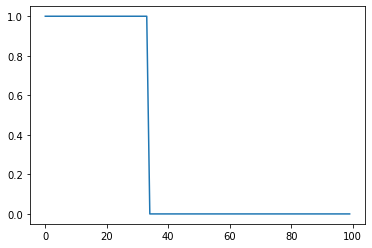

weights for NOR
[-0.20723207 -0.13586607  0.02347006]
[1 0 0 0]


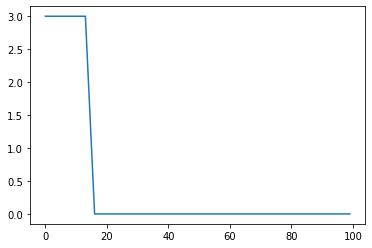

weights for XOR
[-0.10723207  0.06413393  0.02347006]
[1 0 0 1]


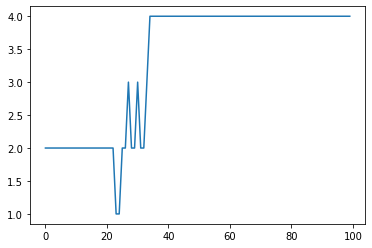

In [405]:
## Part B : Rosenblatt's Percept
#Learnable weights (Perceptron learning)


import numpy as np
import matplotlib.pyplot as plt

def activationfn(v):
    if (v >= 0):
        return 1
    else:
        return 0


def rosenblatt_perceptron(inp_list,output,learning_rate,w_initial,num_epochs,gate):

  error = []
  # w_new = w_initial
  w_1 = w_initial[0][0]
  w_2 = w_initial[0][1]
  theta = w_initial[0][2]
  
  for epoch in range(num_epochs):
    
    err = np.array([0,0,0,0])
    out = np.array([0,0,0,0])

    for i in range(len(inp_list)):

      out[i] = activationfn(np.dot(np.asarray([w_1, w_2]), inp_list[i]) + theta)
      err[i] = output[i] - out[i]

      w_1 = w_1 + learning_rate*err[i]*inp_list[i][0]
      w_2 = w_2 + learning_rate*err[i]*inp_list[i][1]
      theta = theta + learning_rate*err[i]

    error.append(np.sum([abs(e) for e in err]))

    ## Write the learning code here, return new weights and error, Save the error value after each iteration to plot a error v/s iteration graph in case of all 3 gates
  w_new = np.asarray([w_1,w_2, theta])
  print('weights for '+gate)
  print(w_new)
  print(out)
  return w_new,error

inp_list = np.asarray([[0, 0],[0,1],[1,0], [1,1]])
## Create a list consisting of inputs to logic gates (Binary, i.e (0,0),(0,1),(1,0),(1,1))
nand_output = np.asarray([1, 1, 1, 0])
## Define NAND gate target output
nor_output = np.asarray([1, 0, 0, 0])
## Define NOR gate target output
xor_output = np.asarray([0, 1, 1, 0])
## Define XOR gate target output

learning_rate = 0.1
## Define a learning rate
w_initial = np.random.rand(1,3)*5
print('w_initial : ', w_initial)
## Initialise weights
num_epochs = 100
## Set number of epochs

## For NAND gate
w_new,error = rosenblatt_perceptron(inp_list,nand_output,learning_rate,w_initial,num_epochs,"NAND")
plt.plot(list(range(num_epochs)), error)
plt.show()

# For NOR gate
w_new,error = rosenblatt_perceptron(inp_list,nor_output,learning_rate,w_initial,num_epochs,"NOR")
plt.plot(list(range(num_epochs)), error)
plt.show()

## For XOR gate
w_new,error = rosenblatt_perceptron(inp_list,xor_output,learning_rate,w_initial,num_epochs,"XOR")
plt.plot(list(range(num_epochs)), error)
plt.show()

weights for NAND
[-0.2 -0.1  0.2]
[1 1 1 0]


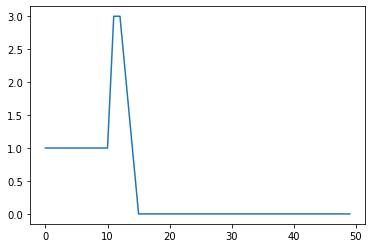

weights for NOR
[-1.00000000e-01 -1.00000000e-01  1.38777878e-16]
[1 0 0 0]


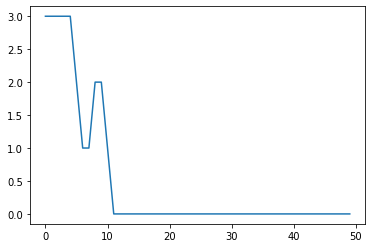

weights for XOR
[-1.00000000e-01  1.38777878e-16  8.32667268e-17]
[1 0 0 1]


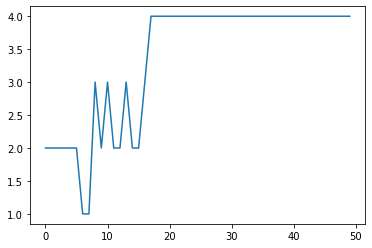

In [444]:
learning_rate = 0.1
## Define a learning rate
w_initial = np.array([[1,1,1]])
## Initialise weights
num_epochs = 50
## Set number of epochs

## For NAND gate
w_new,error = rosenblatt_perceptron(inp_list,nand_output,learning_rate,w_initial,num_epochs,"NAND")
plt.plot(list(range(num_epochs)), error)
plt.show()

# For NOR gate
w_new,error = rosenblatt_perceptron(inp_list,nor_output,learning_rate,w_initial,num_epochs,"NOR")
plt.plot(list(range(num_epochs)), error)
plt.show()

## For XOR gate
w_new,error = rosenblatt_perceptron(inp_list,xor_output,learning_rate,w_initial,num_epochs,"XOR")
plt.plot(list(range(num_epochs)), error)
plt.show()

weights for NAND
[-0.02 -0.01  0.03]
[1 1 1 0]


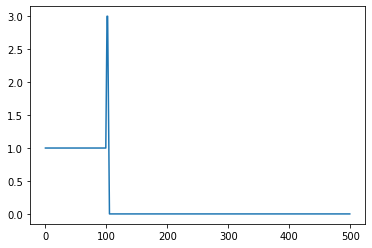

weights for NOR
[-0.01 -0.01  0.01]
[1 0 0 0]


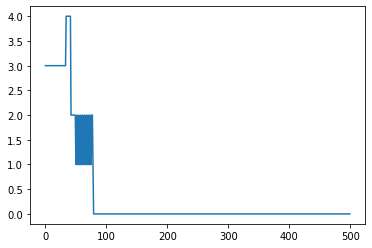

weights for XOR
[-1.00000000e-02 -7.52869989e-16  1.00000000e-02]
[1 0 0 1]


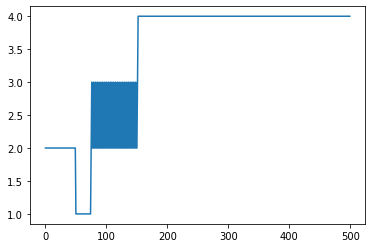

In [445]:
learning_rate = 0.01
## Define a learning rate
w_initial = np.array([[1,1,1]])
## Initialise weights
num_epochs = 500
## Set number of epochs

## For NAND gate
w_new,error = rosenblatt_perceptron(inp_list,nand_output,learning_rate,w_initial,num_epochs,"NAND")
plt.plot(list(range(num_epochs)), error)
plt.show()

# For NOR gate
w_new,error = rosenblatt_perceptron(inp_list,nor_output,learning_rate,w_initial,num_epochs,"NOR")
plt.plot(list(range(num_epochs)), error)
plt.show()

## For XOR gate
w_new,error = rosenblatt_perceptron(inp_list,xor_output,learning_rate,w_initial,num_epochs,"XOR")
plt.plot(list(range(num_epochs)), error)
plt.show()

weights for NAND
[-1.7 -0.8  1.9]
[1 1 1 0]


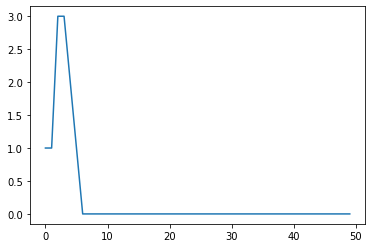

weights for NOR
[-0.8 -0.8  0.1]
[1 0 0 0]


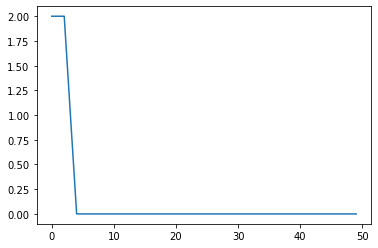

weights for XOR
[-0.8  0.1  0.1]
[1 0 0 1]


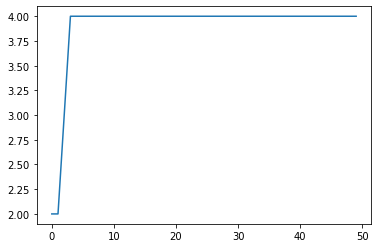

In [448]:
learning_rate = 0.9
## Define a learning rate
w_initial = np.array([[1,1,1]])
## Initialise weights
num_epochs = 50
## Set number of epochs

## For NAND gate
w_new,error = rosenblatt_perceptron(inp_list,nand_output,learning_rate,w_initial,num_epochs,"NAND")
plt.plot(list(range(num_epochs)), error)
plt.show()

# For NOR gate
w_new,error = rosenblatt_perceptron(inp_list,nor_output,learning_rate,w_initial,num_epochs,"NOR")
plt.plot(list(range(num_epochs)), error)
plt.show()

## For XOR gate
w_new,error = rosenblatt_perceptron(inp_list,xor_output,learning_rate,w_initial,num_epochs,"XOR")
plt.plot(list(range(num_epochs)), error)
plt.show()

## Inferences and Conclusion : State all the key observations and conclusion

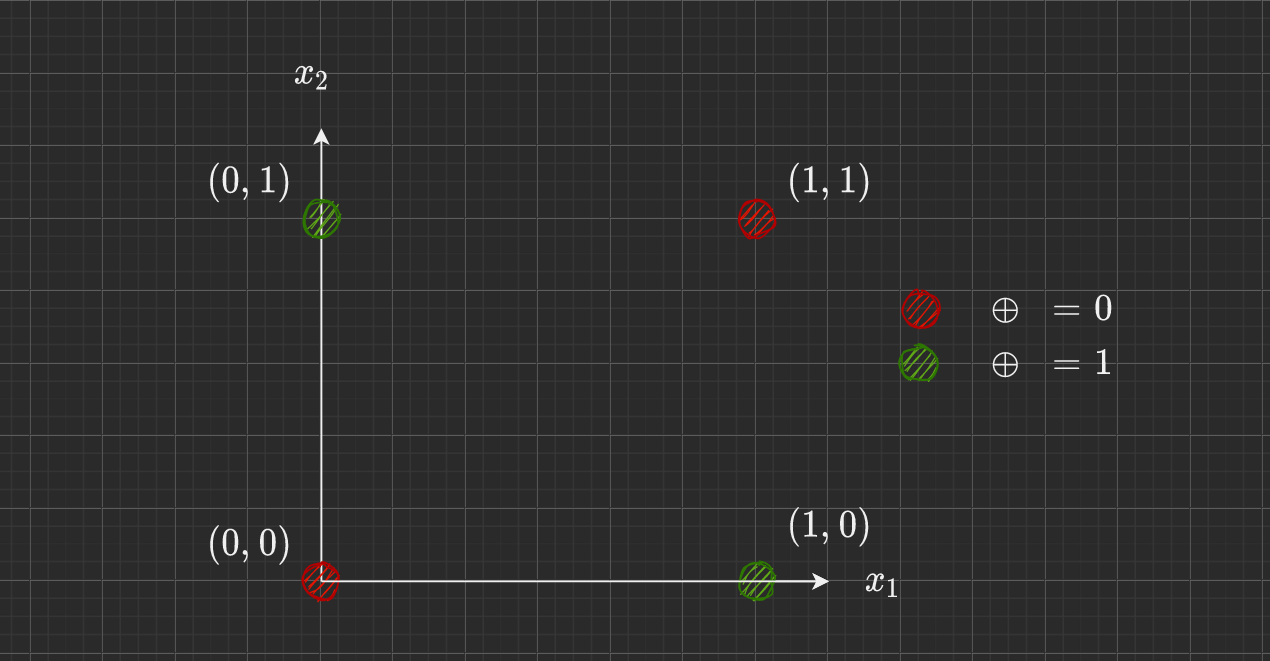

In [1]:
from IPython.display import Image
Image('/Users/joshithagandra/Downloads/Downloads/courses/nndl/1/xor.png')

XOR is not linearly separable data. 

Isn’t capable of imitating the XOR function.

Can be done with 2 decision boundaries

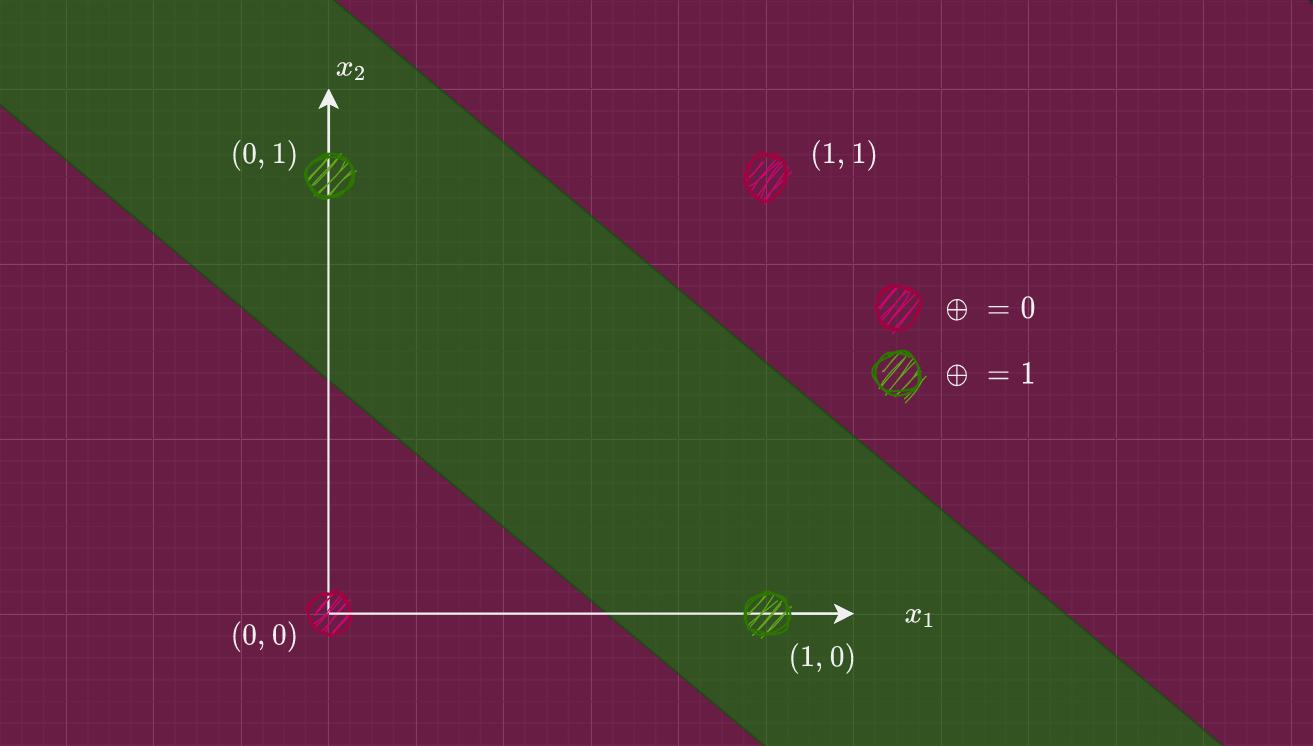

In [2]:
Image('/Users/joshithagandra/Downloads/Downloads/courses/nndl/1/xor_2d.png')

# **Problem 2** : Demonstrate the realization of y = 1 + 2x1 + 2x2 using Widrow’s Adaline model.

  1. Generate some N no. of data points using equation y = 1 + 2x1 + 2x2.
  2. Use the input and output data to train the Adaline model, after training the Adaline
  model should provide appropriate y as output value for any arbitrary input.

## Programming : 
**Widrow's Adaline Model**

Learnable weights (Least mean Square error)

Activation: linear

w_initial : [[0.28 0.28 0.4 ]]
weights :  [1.2619 2.2704 0.997 ]


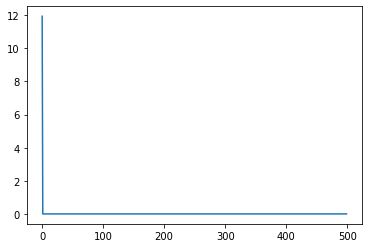

In [8]:
## Widrow Adaline model : Perform the experiment for different weight inialisations and learning rates and state your observations

def widrow_adaline(inp,learning_rate,w_initial,num_epochs,N):

  error = []
  # w_new = w_initial
  w_1 = w_initial[0][0]
  w_2 = w_initial[0][1]
  theta = w_initial[0][2]
  
  for epoch in range(num_epochs):
    
    err = np.array([0] * 100)

    for i in range(len(inp)):
      out = np.dot(np.asarray([w_1, w_2]), inp[i][:2]) + theta
      err[i] = (inp[i][2] - out)**2

      w_1 = w_1 + learning_rate*err[i]*inp[i][0]
      w_2 = w_2 + learning_rate*err[i]*inp[i][1]
      theta = theta + learning_rate*err[i]

    error.append(np.sum(err)/N)

    ## Write the learning code here, return new weights and error, Save the error value after each iteration to plot a error v/s iteration graph in case of all 3 gates
  w_new = np.asarray([w_1,w_2, theta])
  print('weights : ', w_new)
  return w_new,error


N = 50## Set the number of input points 
learning_rate = 0.001
## Define a learning rate
w_initial = np.round(np.random.rand(1,3), 2)
print('w_initial :', w_initial)

## Initialise weights
num_epochs = 500
## Set number of epochs

## Generate the input below 
x1 = np.round(np.linspace(0, 5, N), 1)
x2 = np.round(np.linspace(0, 10, N), 1)
y = 2*x1 + 2*x2 + 1
inp = np.asarray([x1, x2, y]).T
# print(inp[:5])
## An input array of the shape (3,100)

w_new,error = widrow_adaline(inp,learning_rate,w_initial,num_epochs,N)
plt.plot(list(range(num_epochs)), error)
plt.show()

w_initial : [[0.72 0.3  0.44]]
weights :  [1.6083 2.1    0.969 ]


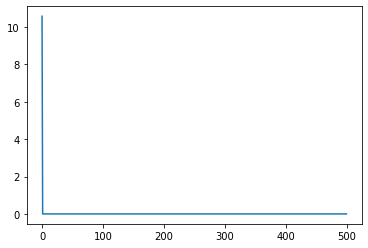

In [10]:
w_initial = np.round(np.random.rand(1,3), 2)
print('w_initial :', w_initial)

w_new,error = widrow_adaline(inp,learning_rate,w_initial,num_epochs,N)
plt.plot(list(range(num_epochs)), error)
plt.show()

w_initial : [[0.88 0.06 0.44]]
weights :  [1.8308 1.9873 1.014 ]


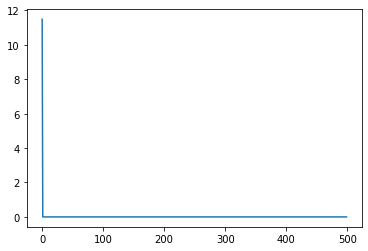

In [11]:
w_initial = np.round(np.random.rand(1,3), 2)
print('w_initial :', w_initial)

w_new,error = widrow_adaline(inp,learning_rate,w_initial,num_epochs,N)
plt.plot(list(range(num_epochs)), error)
plt.show()

w_initial : [[0.58 0.77 0.04]]
weights :  [1.3291 2.2876 0.492 ]


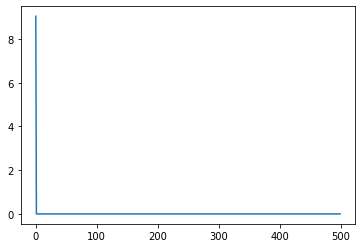

In [12]:
w_initial = np.round(np.random.rand(1,3), 2)
print('w_initial :', w_initial)

w_new,error = widrow_adaline(inp,learning_rate,w_initial,num_epochs,N)
plt.plot(list(range(num_epochs)), error)
plt.show()

w_initial : [[1 1 0]]
weights :  [1.583  2.1798 0.34  ]


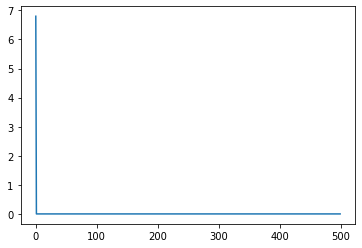

In [13]:
w_initial = np.asarray([[1,1,0]])
print('w_initial :', w_initial)

w_new,error = widrow_adaline(inp,learning_rate,w_initial,num_epochs,N)
plt.plot(list(range(num_epochs)), error)
plt.show()

w_initial : [[1 1 1]]
weights :  [1.5452 2.101  1.275 ]


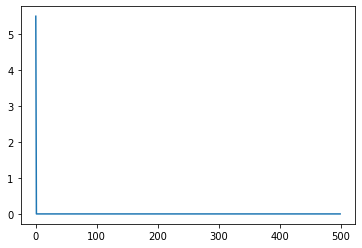

In [14]:
w_initial = np.asarray([[1,1,1]])
print('w_initial :', w_initial)

w_new,error = widrow_adaline(inp,learning_rate,w_initial,num_epochs,N)
plt.plot(list(range(num_epochs)), error)
plt.show()

w_initial : [[-1 -1  0]]
weights :  [0.7339 2.5195 1.211 ]


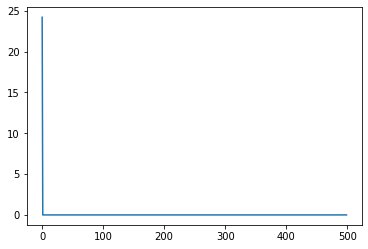

In [15]:
w_initial = np.asarray([[-1,-1,0]])
print('w_initial :', w_initial)

w_new,error = widrow_adaline(inp,learning_rate,w_initial,num_epochs,N)
plt.plot(list(range(num_epochs)), error)
plt.show()

w_initial : [[1 1 1]]
weights :  [1.5452 2.101  1.275 ]


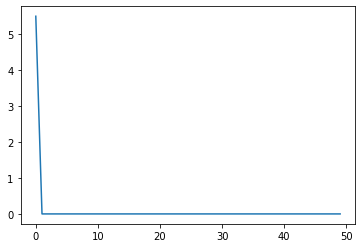

In [16]:
w_initial = np.asarray([[1,1,1]])
print('w_initial :', w_initial)
learning_rate = 0.001
num_epochs = 50

w_new,error = widrow_adaline(inp,learning_rate,w_initial,num_epochs,N)
plt.plot(list(range(num_epochs)), error)
plt.show()

w_initial : [[1 1 1]]
weights :  [1.55441 2.10587 1.17   ]


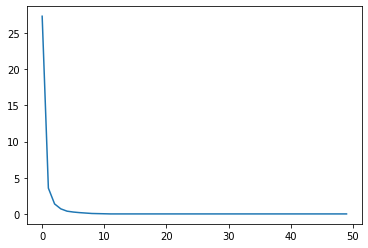

In [18]:
w_initial = np.asarray([[1,1,1]])
print('w_initial :', w_initial)
learning_rate = 0.0001
num_epochs = 50

w_new,error = widrow_adaline(inp,learning_rate,w_initial,num_epochs,N)
plt.plot(list(range(num_epochs)), error)
plt.show()

w_initial : [[1 1 1]]
weights :  [1.3240839 1.6466359 1.084934 ]


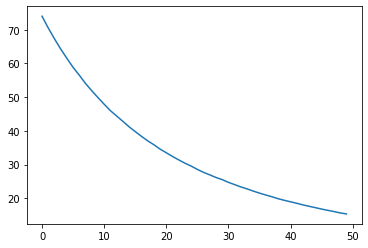

In [17]:
w_initial = np.asarray([[1,1,1]])
print('w_initial :', w_initial)
learning_rate = 0.000001
num_epochs = 50

w_new,error = widrow_adaline(inp,learning_rate,w_initial,num_epochs,N)
plt.plot(list(range(num_epochs)), error)
plt.show()